## Task1: How to deal with Missing Values data preprocessing?
## Task2: How to deal with Outliers data preprocessing?
## Task3: How to get correlation between Numerical-Numerical
## Task4: Apply EDA for this notebook

# **Churn Modelling**


![Alt Text](https://breadcrumbs.io/wp-content/uploads/2021/09/Churn-Analysis-4-1536x804.png.webp)

# Importing libraries and Reading Data

In [6]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from geopy.geocoders import Nominatim
import plotly.figure_factory as ff
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr, f_oneway


# check if the data normally distributed
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
from scipy.stats import chi2_contingency


# Data analysis libraries
from scipy import stats
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from geopy.geocoders import Nominatim
import re
# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import re

# Set up the matplotlib backend for inline plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [7]:
df = pd.read_csv('Churn_Modelling.csv')


In [8]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from geopy.geocoders import Nominatim
import plotly.figure_factory as ff
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr, f_oneway


# check if the data normally distributed
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
from scipy.stats import chi2_contingency


# Data analysis libraries
from scipy import stats
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from geopy.geocoders import Nominatim
import re
# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import re

# Set up the matplotlib backend for inline plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [9]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from geopy.geocoders import Nominatim
import plotly.figure_factory as ff
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr, f_oneway


# check if the data normally distributed
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
from scipy.stats import chi2_contingency


# Data analysis libraries
from scipy import stats
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from geopy.geocoders import Nominatim
import re
# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import re

# Set up the matplotlib backend for inline plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# 📌 Dataset Description: Customer Churn Analysis



##This dataset contains information about bank customers, including demographic details, account balances, and banking behavior.
 The goal is to predict customer churn (whether a customer will leave the bank).
  * Use Cases:
  * Predicting customer churn
  * Understanding credit risk
  * Customer segmentation & engagement analysis

 🔹 Column Descriptions:
* **RowNumber:** Index of the row (sequential ID).

 * **CustomerId** Unique identifier for each customer.

 * **Surname** Last name of the customer.

 * **CreditScore** Numerical creditworthiness score (higher is better).

 * **Geography** Country where the customer is located (e.g., France, Germany, Spain).

 * **Gender** Customer's gender (Male/Female).

 * **Age** Customer's age.

 * **Tenure** Number of years the customer has been with the bank.

 * **Balance** Customer's bank account balance.

 * **NumOfProducts** Number of bank products the customer has (e.g., loans, credit cards).

 * **HasCrCard** Whether the customer owns a credit card (1 = Yes, 0 = No).

 * **IsActiveMember** Whether the customer is actively using the bank’s services (1 = Yes, 0 = No).

 * **EstimatedSalary** Customer’s estimated annual salary.

 * **Exited** Whether the customer left the bank (1 = Yes, 0 = No).




# **Task 1: Explore and Familiarize with the Dataset:**

![alt text](https://assets-global.website-files.com/62c609e220cfd73d2f4f179b/639146ee91bb9016fd8cf0a3_Data%20Exploration%20(1).png)

In [10]:
df.shape

(10000, 14)

* Dataset consists of **```10000 rows```** and **```14 columns```**.

In [11]:
df.head().style.background_gradient('Blues')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Dataset Overview :**
1. No null values but there may be missing values
2. data need to be encoded "Surname" , "Geography", "Gender"

In [14]:
df.duplicated().sum()

np.int64(0)

* No duplicate values

In [15]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [16]:
numerical = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=[object]).columns

Satistics for categorical columns.

In [17]:
df.describe(include='O').T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

most are from france and males , so will se the correlation between if they are from france and males and if withdrawn or not

In [18]:
geo_counts = df['Geography'].value_counts().reset_index()
geo_counts.columns = ['Geography', 'Count']

fig = px.pie(geo_counts, values='Count', names='Geography', title='Geography Distribution')

fig.show()

In [19]:
custom_colors = {0: "Green", 1: "Red"}

fig = px.histogram(df, x='Geography', color='Exited',
                   barmode='group', title='Customer Exited Distribution by Geography',
                   color_discrete_map=custom_colors)

fig.show()

most exited are from germany then france



In [20]:
custom_colors = {0: "Green", 1: "Red"}

fig = px.histogram(df, x='Geography', color='Gender',
                   barmode='group', title='Customer Exited Distribution by Geography',
                   color_discrete_map=custom_colors)

fig.show()

males are the most in the bank but it doesnt mean that they are the most who exited , as it is clear below

In [21]:
male_exited_count = df[(df['Gender'] == 'Male') & (df['Exited'] == 1)].shape[0]

print("Number of males who exited:", male_exited_count)


Number of males who exited: 898


In [22]:
male_exited_count = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)].shape[0]

print("Number of males who exited:", male_exited_count)


Number of males who exited: 1139


In [23]:
df_unique = df[['RowNumber','CustomerId']]
df_unique


RowNumber  CustomerId
0             1    15634602
1             2    15647311
2             3    15619304
3             4    15701354
4             5    15737888
...         ...         ...
9995       9996    15606229
9996       9997    15569892
9997       9998    15584532
9998       9999    15682355
9999      10000    15628319

[10000 rows x 2 columns]

In [24]:
if df['CustomerId'].duplicated().sum() > 0:
        print('There are duplicated values in the CustomerId column')
else:
        print('There are no duplicated values in the CustomerId column')

There are no duplicated values in the CustomerId column


In [25]:
df.drop(['RowNumber'], axis=1, inplace=True)

In [26]:
print("Numerical columns: ", numerical)

Numerical columns:  Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [27]:
print("categorical columns: ", categorical)

categorical columns:  Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [28]:
df.describe().T


count          mean           std          min  \
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

# outliers


In [29]:
df_stats = df.describe().T
df_stats["IQR"] = df_stats["75%"] - df_stats["25%"]

df_stats["Lower Bound"] = df_stats["25%"] - 1.5 * df_stats["IQR"]
df_stats["Upper Bound"] = df_stats["75%"] + 1.5 * df_stats["IQR"]

df_stats["Has Outliers"] = (df_stats["min"] < df_stats["Lower Bound"]) | (df_stats["max"] > df_stats["Upper Bound"])

df_stats[["Lower Bound", "Upper Bound", "min", "max", "Has Outliers"]]


Lower Bound   Upper Bound          min          max  \
CustomerId       1.544147e+07  1.594029e+07  15565701.00  15815690.00   
CreditScore      3.830000e+02  9.190000e+02       350.00       850.00   
Age              1.400000e+01  6.200000e+01        18.00        92.00   
Tenure          -3.000000e+00  1.300000e+01         0.00        10.00   
Balance         -1.914664e+05  3.191106e+05         0.00    250898.09   
NumOfProducts   -5.000000e-01  3.500000e+00         1.00         4.00   
HasCrCard       -1.500000e+00  2.500000e+00         0.00         1.00   
IsActiveMember  -1.500000e+00  2.500000e+00         0.00         1.00   
EstimatedSalary -9.657710e+04  2.969675e+05        11.58    199992.48   
Exited           0.000000e+00  0.000000e+00         0.00         1.00   

                 Has Outliers  
CustomerId              False  
CreditScore              True  
Age                      True  
Tenure                  False  
Balance                 False  
NumOfProducts            True  
HasCrCard               False  
IsActiveMember          False  
EstimatedSalary         False  
Exited                   True

In [30]:
if df_stats["Has Outliers"].any():
    print("There are columns with outliers.")
    print("Columns with outliers: ", df_stats[df_stats["Has Outliers"]].index.tolist())
else:
    print("There are no columns with outliers.")

There are columns with outliers.
Columns with outliers:  ['CreditScore', 'Age', 'NumOfProducts', 'Exited']


In [31]:
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    fig = px.box(df, y=col, title=f"Boxplot of {col}")
    fig.show()

the only numerical column appear to have outliers is "age" , "CreditScore"

In [32]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

# CreditScore

In [33]:
print(f"Min: {df['CreditScore'].min()}")
print(f"Max: {df['CreditScore'].max()}")


Min: 350
Max: 850


In [34]:
credit_scores = df["CreditScore"].unique()
credit_scores.sort()
print(credit_scores)

[350 351 358 359 363 365 367 373 376 382 383 386 395 399 401 404 405 407
 408 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534
 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552
 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570
 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588
 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606
 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624
 625 626 627 628 629 630 631 632 633 634 635 636 63

so can pin it into categories "feature Engineering"


*   Since CreditScore is continuous, we can bin it into categories based on common credit score
* Poor (300-579)
* Fair (580-669)
* Good (670-739)
* Very Good (740-799)
* Excellent (800-850)



In [35]:
bins = [300, 579, 669, 739, 799, 850]
labels = ["Poor", "Fair", "Good", "Very Good", "Excellent"]

df["CreditScore_Category"] = pd.cut(df["CreditScore"], bins=bins, labels=labels, include_lowest=True)

print(df["CreditScore_Category"].value_counts())

CreditScore_Category
Fair         3331
Good         2428
Poor         2362
Very Good    1224
Excellent     655
Name: count, dtype: int64


In [36]:
fig = px.histogram(df, x="CreditScore_Category", color="Exited",
                   barmode="group", title="Customer Exited Distribution by Credit Score Category",
                   color_discrete_map={0: "blue", 1: "red"})
fig.show()

most exited are poor and fair "under the middle class"

#Surname

In [37]:

weird_surnames = df[df["Surname"].str.contains(r"[^a-zA-Z]", regex=True, na=False)]

print(weird_surnames["Surname"].unique())


['H?' "O'Brien" "T'ien" "T'ang" "T'ao" "Ch'ien" "O'Sullivan" "Ch'iu"
 "K'ung" "O'Donnell" "Ts'ai" 'L?' 'De Salis' 'Hs?' "Ch'en" 'De Luca'
 'Wentworth-Shields' "Ts'ao" "Ch'ang" "P'an" "Ts'ui" "P'eng" "Ch'eng"
 "O'Loghlen" 'Y?an' "Ch'in" 'Li Fonti' 'Winter-Irving' "O'Neill"
 'Drake-Brockman' "T'an" 'K?' "D'Albertis" 'Le Grand' 'Y?' "O'Meara"
 "O'Toole" 'Lo Duca' 'Collingridge de Tourcey' 'Le Gallienne'
 'De Bernales' "O'Connor" 'Warlow-Davies' 'De Garis' 'Hs?eh' 'Du Cane'
 'De Neeve' 'To Rot' 'Hughes-Jones' 'Cumbrae-Stewart' 'Radcliffe-Brown'
 'Edmund la Touche' 'Parry-Okeden' "O'Loughlin" 'Ross-Watt'
 'Fleetwood-Smith' 'Barclay-Harvey' 'Le Hunte' "O'Loghlin" "O'Callaghan"
 'Ah Mouy' 'Howell-Price' 'St Clair' 'Von Doussa' 'De Mestre'
 'Marshall-Hall' 'Hayes-Williams' "O'Kane"]


so will remore that has ' because it might be their names

In [38]:
weird_surnames = df[df["Surname"].str.contains(r"[^a-zA-Z]", regex=True, na=False)]

for surname in weird_surnames["Surname"].unique():
    print(surname)


H?
O'Brien
T'ien
T'ang
T'ao
Ch'ien
O'Sullivan
Ch'iu
K'ung
O'Donnell
Ts'ai
L?
De Salis
Hs?
Ch'en
De Luca
Wentworth-Shields
Ts'ao
Ch'ang
P'an
Ts'ui
P'eng
Ch'eng
O'Loghlen
Y?an
Ch'in
Li Fonti
Winter-Irving
O'Neill
Drake-Brockman
T'an
K?
D'Albertis
Le Grand
Y?
O'Meara
O'Toole
Lo Duca
Collingridge de Tourcey
Le Gallienne
De Bernales
O'Connor
Warlow-Davies
De Garis
Hs?eh
Du Cane
De Neeve
To Rot
Hughes-Jones
Cumbrae-Stewart
Radcliffe-Brown
Edmund la Touche
Parry-Okeden
O'Loughlin
Ross-Watt
Fleetwood-Smith
Barclay-Harvey
Le Hunte
O'Loghlin
O'Callaghan
Ah Mouy
Howell-Price
St Clair
Von Doussa
De Mestre
Marshall-Hall
Hayes-Williams
O'Kane


some names have ? so will se their rows

In [39]:
# Filter rows where Surname contains '?'
weird_surnames_df = df[df["Surname"].str.contains(r"\?", regex=True, na=False)]

weird_surnames_df


CustomerId Surname  CreditScore Geography  Gender  Age  Tenure  \
9       15592389      H?          684    France    Male   27       2   
329     15624528      L?          664   Germany    Male   26       7   
437     15624623     Hs?          516    France    Male   35      10   
941     15676521    Y?an          696    France  Female   31       8   
970     15805955      L?          638    France  Female   48      10   
...          ...     ...          ...       ...     ...  ...     ...   
9633    15668057      K?          669    France  Female   31       6   
9704    15759872      L?          625    France    Male   22       9   
9792    15787168      Y?          819     Spain  Female   28       8   
9857    15779423      K?          716    France    Male   39       1   
9910    15784042      L?          624    France    Male   55       7   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
9     134603.88              1          1               1         71725.73   
329   116244.14              2          1               1         95145.14   
437   104088.59              2          0               0        119666.00   
941        0.00              2          0               0        191074.11   
970   138333.03              1          1               1         47679.14   
...         ...            ...        ...             ...              ...   
9633  113000.66              1          1               0         40467.82   
9704       0.00              2          1               0        157072.91   
9792  168253.21              1          1               1        102799.14   
9857   70657.61              2          1               1         76476.05   
9910  118793.60              1          1               1         95022.02   

      Exited CreditScore_Category  
9          0                 Good  
329        0                 Fair  
437        0                 Poor  
941        0                 Good  
970        0                 Fair  
...      ...                  ...  
9633       0                 Fair  
9704       0                 Fair  
9792       0            Excellent  
9857       0                 Good  
9910       1                 Fair  

[92 rows x 14 columns]

In [40]:
filtered_df = df[
    (df["Surname"].str.contains(r"\?", regex=True, na=False)) &
    (df["IsActiveMember"] == 0) &
    (df["Exited"] == 0) &
    (df["Balance"] == 0)
]


filtered_df


CustomerId Surname  CreditScore Geography  Gender  Age  Tenure  Balance  \
941     15676521    Y?an          696    France  Female   31       8      0.0   
977     15582616    Y?an          520    France  Female   38       4      0.0   
1435    15596021      K?          598     Spain    Male   44       8      0.0   
1668    15755722      H?          554    France    Male   24      10      0.0   
2384    15758531      Y?          732    France  Female   40      10      0.0   
4353    15804822      L?          805    France  Female   31       4      0.0   
5064    15671243      Y?          558    France  Female   47       9      0.0   
5474    15696277     Hs?          651    France  Female   34       9      0.0   
6002    15783026      H?          701    France  Female   41       2      0.0   
6401    15579040     Hs?          556    France  Female   46      10      0.0   
8190    15813871     Hs?          690    France    Male   47       2      0.0   
9553    15809585      H?          646    France    Male   38       7      0.0   
9704    15759872      L?          625    France    Male   22       9      0.0   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
941               2          0               0        191074.11       0   
977               2          1               0         56388.63       0   
1435              2          1               0        148487.90       0   
1668              1          0               0         92180.62       0   
2384              2          1               0        154189.08       0   
4353              2          1               0          4798.12       0   
5064              2          1               0        103787.28       0   
5474              2          1               0        138113.71       0   
6002              1          1               0         47856.78       0   
6401              2          0               0        109184.24       0   
8190              2          1               0        151375.73       0   
9553              2          1               0          1528.40       0   
9704              2          1               0        157072.91       0   

     CreditScore_Category  
941                  Good  
977                  Poor  
1435                 Fair  
1668                 Poor  
2384                 Good  
4353            Excellent  
5064                 Poor  
5474                 Fair  
6002                 Good  
6401                 Poor  
8190                 Good  
9553                 Fair  
9704                 Fair

In [41]:
count = df[
    (df["Surname"].str.contains(r"\?", regex=True, na=False)) &
    (df["IsActiveMember"] == 0) &
    (df["Exited"] == 0) &
    (df["Balance"] == 0)
].shape[0]

print("Count:", count)

Count: 13


!!!! might drop them

In [42]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

fig = px.pie(df, names="Age_Group", title="Age Distribution", hole=0.3)

fig.show()


In [43]:
fig = px.scatter(filtered_df, x="Age", y="EstimatedSalary",
                 title="Estimated Salary vs Age (Age > 25)",
                 trendline="ols")

fig.show()


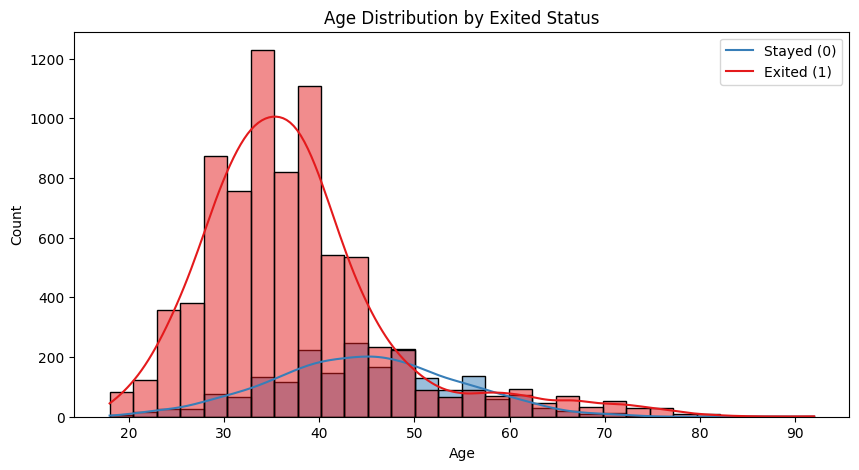

In [44]:


plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", hue="Exited", bins=30, kde=True, palette="Set1")
plt.title("Age Distribution by Exited Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Stayed (0)", "Exited (1)"])
plt.show()


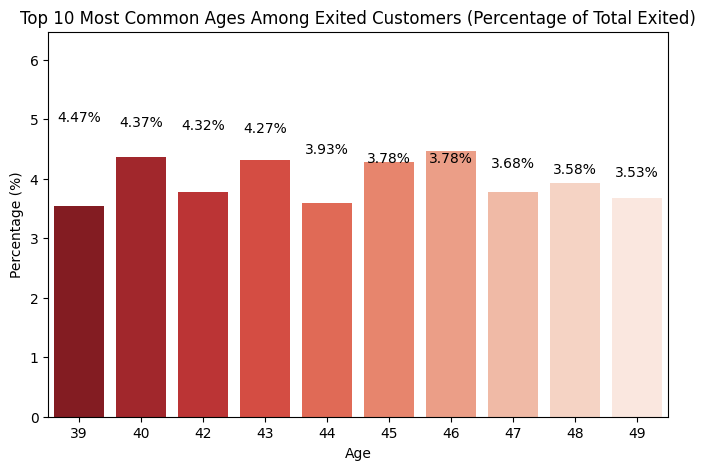

In [45]:


age_counts = df[df["Exited"] == 1]["Age"].value_counts()

total_exited = df["Exited"].sum()

top_ages = age_counts.nlargest(10)

percentages = (top_ages / total_exited) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=top_ages.index, y=percentages.values, palette="Reds_r")

plt.xlabel("Age")
plt.ylabel("Percentage (%)")
plt.title("Top 10 Most Common Ages Among Exited Customers (Percentage of Total Exited)")
plt.ylim(0, percentages.max() + 2)

for i, p in enumerate(percentages.values):
    plt.text(i, p + 0.5, f"{p:.2f}%", ha='center', fontsize=10)

plt.show()


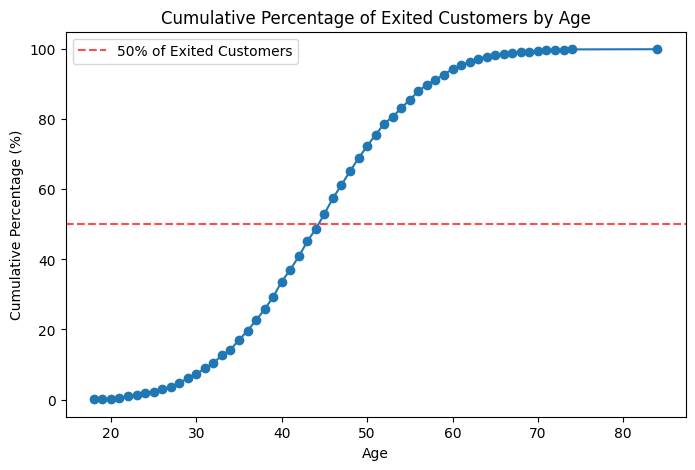

In [46]:
import numpy as np

sorted_ages = age_counts.sort_index()
cumulative_percentages = np.cumsum(sorted_ages) / total_exited * 100

plt.figure(figsize=(8, 5))
plt.plot(sorted_ages.index, cumulative_percentages, marker='o', linestyle='-')

plt.xlabel("Age")
plt.ylabel("Cumulative Percentage (%)")
plt.title("Cumulative Percentage of Exited Customers by Age")

plt.axhline(50, color="red", linestyle="--", alpha=0.7, label="50% of Exited Customers")
plt.legend()
plt.show()


so the ages between 20-35 and 60-75 are most exited

# Tenure

In [47]:

fig = px.histogram(
    df,
    x="Tenure",
    nbins=20,
    title="Distribution of Customer Tenure",
    labels={"Tenure": "Customer Tenure (Years)", "count": "Number of Customers"},
    color_discrete_sequence=["blue"]
)

fig.update_layout(
    bargap=0.1,
    template="plotly_white"
)

fig.show()


In [48]:

filtered_df = df[df["Tenure"].isin([1 ,2,3,4,5,6,7,8, 9, 10])]

fig = px.histogram(
    filtered_df,
    x="Tenure",
    color="Exited",
    title="Exited vs. Non-Exited Customers (Tenure:Years)",
    labels={"Tenure": "Customer Tenure (Years)", "count": "Number of Customers"},
    barmode="group",
    color_discrete_map={0: "blue", 1: "red"}
)

fig.update_layout(
    bargap=0.2,
    template="plotly_white"
)

fig.show()


most exited 0 yrs and 9 yrs so no relation

# Balance

In [49]:
max_balance = df["Balance"].max()
min_balance = df["Balance"].min()

print(f"Maximum Balance: {max_balance}")
print(f"Minimum Balance: {min_balance}")


Maximum Balance: 250898.09
Minimum Balance: 0.0


In [50]:
zero_balance_df = df[df["Balance"] == 0.0]
zero_balance_df


CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602     Hargrave          619    France  Female   42       2   
3       15701354         Boni          699    France  Female   39       1   
6       15592531     Bartlett          822    France    Male   50       7   
11      15737173      Andrews          497     Spain    Male   24       3   
12      15632264          Kay          476    France  Female   34      10   
...          ...          ...          ...       ...     ...  ...     ...   
9989    15605622     McMillan          841     Spain    Male   28       4   
9992    15657105  Chukwualuka          726     Spain    Male   36       2   
9994    15719294         Wood          800    France  Female   29       2   
9995    15606229     Obijiaku          771    France    Male   39       5   
9997    15584532          Liu          709    France  Female   36       7   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0         0.0              1          1               1        101348.88   
3         0.0              2          0               0         93826.63   
6         0.0              2          1               1         10062.80   
11        0.0              2          1               0         76390.01   
12        0.0              2          1               0         26260.98   
...       ...            ...        ...             ...              ...   
9989      0.0              2          1               1        179436.60   
9992      0.0              1          1               0        195192.40   
9994      0.0              2          0               0        167773.55   
9995      0.0              2          1               0         96270.64   
9997      0.0              1          0               1         42085.58   

      Exited CreditScore_Category Age_Group  
0          1                 Fair     35-44  
3          0                 Good     35-44  
6          0            Excellent     45-54  
11         0                 Poor     18-24  
12         0                 Poor     25-34  
...      ...                  ...       ...  
9989       0            Excellent     25-34  
9992       0                 Good     35-44  
9994       0            Excellent     25-34  
9995       0            Very Good     35-44  
9997       1                 Good     35-44  

[3617 rows x 15 columns]

In [51]:
zero_balance_count = zero_balance_df.shape[0]

exited_with_zero_balance = zero_balance_df["Exited"].sum()

print(f"Total Customers with 0.0 Balance: {zero_balance_count}")
print(f"Exited Customers with 0.0 Balance: {exited_with_zero_balance}")


Total Customers with 0.0 Balance: 3617
Exited Customers with 0.0 Balance: 500


In [52]:

fig = px.histogram(
    df,
    x="Balance",
    nbins=50,
    title="Distribution of Customer Balance",
    labels={"Balance": "Balance Amount", "count": "Number of Customers"},
    color_discrete_sequence=["blue"]
)

fig.show()


it seams a distibuted bell shape but with amount 5000 is the most people and disturb the bell shape

In [53]:
max_exited_balance = df[df["Exited"] == 1]["Balance"].max()
min_exited_balance = df[df["Exited"] == 1]["Balance"].min()

print(f"Maximum Balance (Exited Customers): {max_exited_balance}")
print(f"Minimum Balance (Exited Customers): {min_exited_balance}")


Maximum Balance (Exited Customers): 250898.09
Minimum Balance (Exited Customers): 0.0


In [54]:
balance_5000_exited = df[(df["Balance"] == 5000) & (df["Exited"] == 1)].shape[0]
print(f"Number of customers with Balance 5000 who exited: {balance_5000_exited}")


Number of customers with Balance 5000 who exited: 0


# NumOfProducts

In [55]:

product_distribution = df["NumOfProducts"].value_counts().reset_index()
product_distribution.columns = ["NumOfProducts", "count"]

fig = px.pie(
    product_distribution,
    values="count",
    names="NumOfProducts",
    title="Distribution of Number of Products Among Customers",
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()


most customers 1 or 2

In [56]:
exited_customers = df[df["Exited"] == 1]["NumOfProducts"].value_counts().reset_index()
exited_customers.columns = ["NumOfProducts", "count"]

fig = px.pie(
    exited_customers,
    values="count",
    names="NumOfProducts",
    title="Exited Customers by Number of Products",
    hole=0.3,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()


most people exited only tried 1 product


In [57]:
product_exit_comparison = df.groupby(["NumOfProducts", "Exited"]).size().reset_index(name="count")

fig = px.bar(
    product_exit_comparison,
    x="NumOfProducts",
    y="count",
    color="Exited",
    barmode="group",
    title="Exited vs. Non-Exited Customers by Number of Products",
    labels={"NumOfProducts": "Number of Products", "count": "Customer Count", "Exited": "Exited (0 = No, 1 = Yes)"},
    color_discrete_map={0: "blue", 1: "red"}
)

fig.show()


In [58]:

product_4_exited = df[(df["NumOfProducts"] == 4) & (df["Exited"] == 1)]

fig = px.histogram(
    product_4_exited,
    x="Balance",
    nbins=50,
    title="Balance Distribution for Customers with 4 Products Who Exited",
    labels={"Balance": "Balance Amount", "count": "Number of Customers"},
    color_discrete_sequence=["red"]
)

fig.show()


# HasCrCard

In [59]:

credit_card_exit = df.groupby(["HasCrCard", "Exited"]).size().reset_index(name="count")

fig = px.bar(
    credit_card_exit,
    x="HasCrCard",
    y="count",
    color="Exited",
    barmode="group",
    title="Exited vs. Non-Exited Customers by Credit Card Ownership",
    labels={"HasCrCard": "Has Credit Card (0 = No, 1 = Yes)", "count": "Customer Count", "Exited": "Exited (0 = No, 1 = Yes)"},
    color_discrete_map={0: "blue", 1: "red"}
)

fig.show()


is apears that the most exited re the pple who has creditcard

In [60]:

active_exit = df.groupby(["IsActiveMember", "Exited"]).size().reset_index(name="count")
total_counts = active_exit.groupby("IsActiveMember")["count"].transform("sum")
active_exit["percentage"] = (active_exit["count"] / total_counts) * 100

fig = px.bar(
    active_exit,
    x="IsActiveMember",
    y="percentage",
    color="Exited",
    barmode="stack",
    title="Percentage of Exited vs. Non-Exited Customers by Active Membership",
    labels={"IsActiveMember": "Is Active Member (0 = No, 1 = Yes)", "percentage": "Percentage (%)", "Exited": "Exited (0 = No, 1 = Yes)"},
    color_discrete_map={0: "blue", 1: "red"}
)

fig.show()


apperently non active are the most exited

#correlation

In [61]:

numerical_df = df.select_dtypes(include=["number"])

correlation_matrix = numerical_df.corr()

fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.index.tolist(),
    colorscale="Viridis",
    annotation_text=correlation_matrix.round(2).values,
    showscale=True
)

fig.update_layout(
    title="Correlation Heatmap of Numerical Features",
    width=800,
    height=700
)

fig.show()


Exited mostly correlates with balance and age


In [62]:


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

categorical_cols = ['Surname', 'Geography', 'Gender']
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

print(cramers_results)


            Surname Geography    Gender
Surname         1.0  0.541387  0.542075
Geography  0.541387       1.0  0.026302
Gender     0.542075  0.026302       1.0


* Surname vs Geography (0.5414)

* There is a moderate association between Surname and Geography, meaning that people with the same surname might be geographically clustered (e.g., families from the same region).
* Surname vs Gender (0.5421)

* Similarly, Surname and Gender have a moderate association, suggesting that certain surnames may be more common among specific genders.
Geography vs Gender (0.0263)

* This is a very weak association, meaning that a person’s geography does not strongly influence their gender distribution.
Key Takeaways:
* Surname is moderately associated with both Geography and Gender, implying possible demographic patterns.
Geography and Gender are almost independent, meaning location does not significantly determine gender distribution.

In [63]:


num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

corr_results = {}

for cat_col in cat_cols:
    unique_vals = df[cat_col].nunique()

    for num_col in num_cols:
        if unique_vals == 2:
            df[cat_col] = df[cat_col].astype('category').cat.codes
            corr, p_value = pointbiserialr(df[cat_col], df[num_col])
        else:
            groups = [df[num_col][df[cat_col] == val] for val in df[cat_col].unique()]
            corr, p_value = f_oneway(*groups)

        corr_results[f"{cat_col} vs {num_col}"] = (corr, p_value)

corr_df = pd.DataFrame(corr_results, index=['Correlation', 'p-value']).T
print(corr_df)


                                          Correlation        p-value
Surname vs CustomerId                        1.008277   3.936850e-01
Surname vs CreditScore                       0.960120   9.035067e-01
Surname vs Age                               0.993522   5.811271e-01
Surname vs Tenure                            0.994808   5.648114e-01
Surname vs Balance                           0.985171   6.829797e-01
Surname vs NumOfProducts                     1.021215   2.479671e-01
Surname vs HasCrCard                         0.969543   8.386793e-01
Surname vs IsActiveMember                    0.994487   5.689002e-01
Surname vs EstimatedSalary                   1.007738   4.003243e-01
Surname vs Exited                            0.931484   9.883569e-01
Geography vs CustomerId                      0.305588   7.366973e-01
Geography vs CreditScore                     0.399420   6.707197e-01
Geography vs Age                            12.106271   5.606220e-06
Geography vs Tenure               

* Surname is not useful for prediction as it shows no meaningful correlation with numerical features.

* Geography, Age Group, and Credit Score Category have strong influences on balance, tenure, and churn (Exited).

* Gender has a weak effect on churn (Exited) but is statistically significant.

* Tenure and Age are important predictors for various customer behaviors, including balance and credit usage.

* Credit Score is highly predictable from CreditScore_Category, which is expected.

* Strongly Correlated Pairs (Statistically Significant)


* Geography vs Age (F = 12.1, p = 5.6e-6) → Age distribution varies significantly by location.
* Geography vs Balance (F = 958.4, p ≈ 0.0) → Strong correlation, meaning balance varies by location.
* Geography vs Exited (F = 155.2, p ≈ 0.0) → Exit rates are significantly different among geographical regions.

* Age_Group vs Balance (F = 4.16, p = 0.0008), NumOfProducts (F = 3.74, p = 0.0021)**, IsActiveMember (F = 42.8, p = 7.97e-44), EstimatedSalary (F = 3.00, p = 0.01), Exited (F = 323.01, p ≈ 0.0) → Indicates age significantly affects these factors.

* Tenure Group vs Tenure (F = 16507.0, p ≈ 0.0) → As expected, very strong correlation.
